## Model 1

In [1]:
import numpy as np
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse.linalg import spsolve

alpha_coeff, beta_coeff = 3.0, 4.0
x_start, x_end = -5.0, 5.0
y_start, y_end = 0.0, 10.0
num_x_points, num_y_points = 51, 51

x_step = (x_end - x_start) / (num_x_points - 1)
y_step = (y_end - y_start) / (num_y_points - 1)

x_grid = np.linspace(x_start, x_end, num_x_points)
y_grid = np.linspace(y_start, y_end, num_y_points)

In [2]:
def to_1d_index(x_idx, y_idx):
    return y_idx + x_idx * num_y_points

# Ініціалізація масиву розв'язку
solution_grid = np.zeros((num_x_points, num_y_points))

# Граничні умови
split_y_index = np.searchsorted(y_grid, 5.0)
solution_grid[0, split_y_index:] = 1.0

split_x_index = np.searchsorted(x_grid, 0.0)
solution_grid[:split_x_index + 1, -1] = 1.0

# Ініціалізація матриці та вектора системи
matrix_A = lil_matrix((num_x_points * num_y_points, num_x_points * num_y_points))
vector_b = np.zeros(num_x_points * num_y_points)

In [3]:
for x_idx in range(num_x_points):
    for y_idx in range(num_y_points):
        current_row = to_1d_index(x_idx, y_idx)

        # Граничні умови
        if x_idx == 0:  # Ліва границя
            if y_idx >= split_y_index:
                matrix_A[current_row, current_row] = 1.0
                vector_b[current_row] = 1.0
            else:
                matrix_A[current_row, current_row] = 1.0
                matrix_A[current_row, to_1d_index(1, y_idx)] = -1.0
            continue

        if x_idx == num_x_points - 1:  # Права границя
            if y_idx < split_y_index:
                matrix_A[current_row, current_row] = 1.0
                vector_b[current_row] = 0.0
            else:
                matrix_A[current_row, current_row] = 1.0
                matrix_A[current_row, to_1d_index(num_x_points - 2, y_idx)] = -1.0
            continue

        if y_idx == num_y_points - 1:  # Верхня границя
            if x_idx <= split_x_index:
                matrix_A[current_row, current_row] = 1.0
                vector_b[current_row] = 1.0
            else:
                matrix_A[current_row, current_row] = 1.0
                matrix_A[current_row, to_1d_index(x_idx, num_y_points - 2)] = -1.0
            continue

        if y_idx == 0:  # Нижня границя
            if x_idx >= split_x_index:
                matrix_A[current_row, current_row] = 1.0
                vector_b[current_row] = 0.0
            else:
                matrix_A[current_row, current_row] = 1.0
                matrix_A[current_row, to_1d_index(x_idx, 1)] = -1.0
            continue

        # Внутрішні вузли
        matrix_A[current_row, to_1d_index(x_idx, y_idx)] = -2 * alpha_coeff / x_step**2 - 2 * beta_coeff / y_step**2
        matrix_A[current_row, to_1d_index(x_idx - 1, y_idx)] = alpha_coeff / x_step**2 + 1.0 / (2 * x_step)
        matrix_A[current_row, to_1d_index(x_idx + 1, y_idx)] = alpha_coeff / x_step**2 - 1.0 / (2 * x_step)
        matrix_A[current_row, to_1d_index(x_idx, y_idx - 1)] = beta_coeff / y_step**2
        matrix_A[current_row, to_1d_index(x_idx, y_idx + 1)] = beta_coeff / y_step**2
        vector_b[current_row] = 0.0

In [4]:
matrix_A = csr_matrix(matrix_A)

# Розв'язання лінійної системи
flat_solution = spsolve(matrix_A, vector_b)

# Перетворення розв'язку у 2D-формат
solution_grid_2d = flat_solution.reshape((num_x_points, num_y_points))
X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)

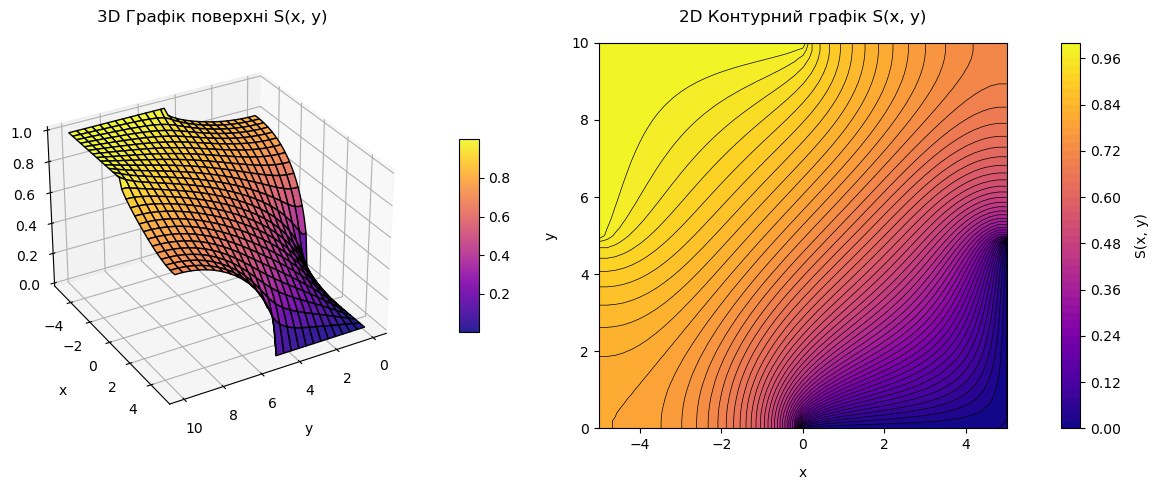

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

ax_3d = fig.add_subplot(1, 2, 1, projection='3d')
surface_plot = ax_3d.plot_surface(
    Y_mesh, X_mesh, solution_grid_2d.T,
    cmap='plasma', edgecolor='k', alpha=0.9
)
ax_3d.set_xlabel('y', labelpad=10)
ax_3d.set_ylabel('x', labelpad=10)
ax_3d.set_zlabel('S(x, y)', labelpad=10)
ax_3d.set_title('3D Графік поверхні S(x, y)', pad=15)
ax_3d.view_init(elev=30, azim=60) 
fig.colorbar(surface_plot, ax=ax_3d, shrink=0.5, aspect=10, pad=0.1)

ax_2d = fig.add_subplot(1, 2, 2)
contour_plot = ax_2d.contourf(
    x_grid, y_grid, solution_grid_2d.T, 
    levels=50, cmap='plasma'
)
ax_2d.set_xlabel('x', labelpad=10)
ax_2d.set_ylabel('y', labelpad=10)
ax_2d.set_title('2D Контурний графік S(x, y)', pad=15)
cbar = fig.colorbar(contour_plot, ax=ax_2d, orientation='vertical', pad=0.1)
cbar.set_label('S(x, y)', labelpad=10)

ax_2d.contour(
    x_grid, y_grid, solution_grid_2d.T, 
    levels=50, colors='k', linewidths=0.5
)

plt.tight_layout()
plt.show()


## Model 2

In [6]:
alpha_param, beta_param = 3.0, 4.0
xi_start, xi_end = -2.0, 2.0
eta_start, eta_end = 0.0, 4.0

num_x_points, num_y_points = 51, 51
dxi_step = (xi_end - xi_start) / (num_x_points - 1)
deta_step = (eta_end - eta_start) / (num_y_points - 1)

xi_grid = np.linspace(xi_start, xi_end, num_x_points)
eta_grid = np.linspace(eta_start, eta_end, num_y_points)

In [7]:
def idx(i, j):
    return j + i * num_y_points

solution_grid = np.zeros((num_x_points, num_y_points))

eta_mid_index = np.searchsorted(eta_grid, 2.0)
xi_zero_index = np.searchsorted(xi_grid, 0.0)

matrix_A = lil_matrix((num_x_points * num_y_points, num_x_points * num_y_points))
vector_b = np.zeros(num_x_points * num_y_points)


In [8]:
for i in range(num_x_points):
    xi = xi_grid[i]
    for j in range(num_y_points):
        eta = eta_grid[j]
        linear_index = idx(i, j)

        # Граничні умови
        if i == 0:
            if j >= eta_mid_index:
                matrix_A[linear_index, linear_index] = 1.0
                vector_b[linear_index] = 1.0
            else:
                matrix_A[linear_index, linear_index] = 1.0
                matrix_A[linear_index, idx(1, j)] = -1.0
            continue

        if i == num_x_points - 1:
            if j < eta_mid_index:
                matrix_A[linear_index, linear_index] = 1.0
                vector_b[linear_index] = 0.0
            else:
                matrix_A[linear_index, linear_index] = 1.0
                matrix_A[linear_index, idx(num_x_points - 2, j)] = -1.0
            continue

        if j == num_y_points - 1:
            if i <= xi_zero_index:
                matrix_A[linear_index, linear_index] = 1.0
                vector_b[linear_index] = 1.0
            else:
                matrix_A[linear_index, linear_index] = 1.0
                matrix_A[linear_index, idx(i, num_y_points - 2)] = -1.0
            continue

        if j == 0:
            if i >= xi_zero_index:
                matrix_A[linear_index, linear_index] = 1.0
                vector_b[linear_index] = 0.0
            else:
                matrix_A[linear_index, linear_index] = 1.0
                matrix_A[linear_index, idx(i, 1)] = -1.0
            continue

        # Внутрішні точки
        coeff_x_prev = 1.0 / (dxi_step**2) - (xi / (2 * dxi_step))
        coeff_x_next = 1.0 / (dxi_step**2) + (xi / (2 * dxi_step))
        coeff_y_prev = 1.0 / (deta_step**2) + (eta / (2 * deta_step))
        coeff_y_next = 1.0 / (deta_step**2) - (eta / (2 * deta_step))
        coeff_center = -2.0 / (dxi_step**2) - 2.0 / (deta_step**2)

        matrix_A[linear_index, idx(i, j)] = coeff_center
        matrix_A[linear_index, idx(i - 1, j)] = coeff_x_prev
        matrix_A[linear_index, idx(i + 1, j)] = coeff_x_next
        matrix_A[linear_index, idx(i, j - 1)] = coeff_y_prev
        matrix_A[linear_index, idx(i, j + 1)] = coeff_y_next

In [9]:
matrix_A = matrix_A.tocsr()
solution_flat = spsolve(matrix_A, vector_b)
solution_reshaped = solution_flat.reshape((num_x_points, num_y_points))
XI, ETA = np.meshgrid(xi_grid, eta_grid)

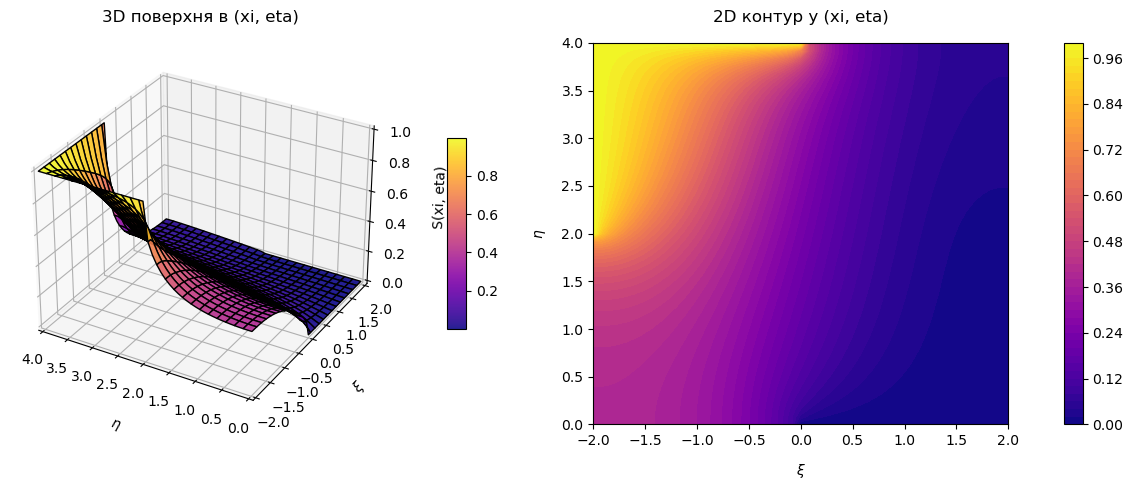

In [11]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surface1 = ax1.plot_surface(ETA, XI, solution_reshaped.T, cmap='plasma', edgecolor='k', alpha=0.9)
ax1.set_xlabel(r'$\eta$', labelpad=10)
ax1.set_ylabel(r'$\xi$', labelpad=10)
ax1.set_zlabel('S(xi, eta)', labelpad=10)
ax1.set_xlim(4, 0)
ax1.set_ylim(-2, 2)
ax1.set_title('3D поверхня в (xi, eta)', pad=15)
fig.colorbar(surface1, ax=ax1, shrink=0.5, aspect=10, pad=0.1)

ax2 = fig.add_subplot(1, 2, 2)
contour1 = ax2.contourf(xi_grid, eta_grid, solution_reshaped.T, 50, cmap='plasma')
ax2.set_xlabel(r'$\xi$', labelpad=10)
ax2.set_ylabel(r'$\eta$', labelpad=10)
ax2.set_title('2D контур у (xi, eta)', pad=15)
fig.colorbar(contour1, ax=ax2, orientation='vertical', pad=0.1)

plt.tight_layout()
plt.show()

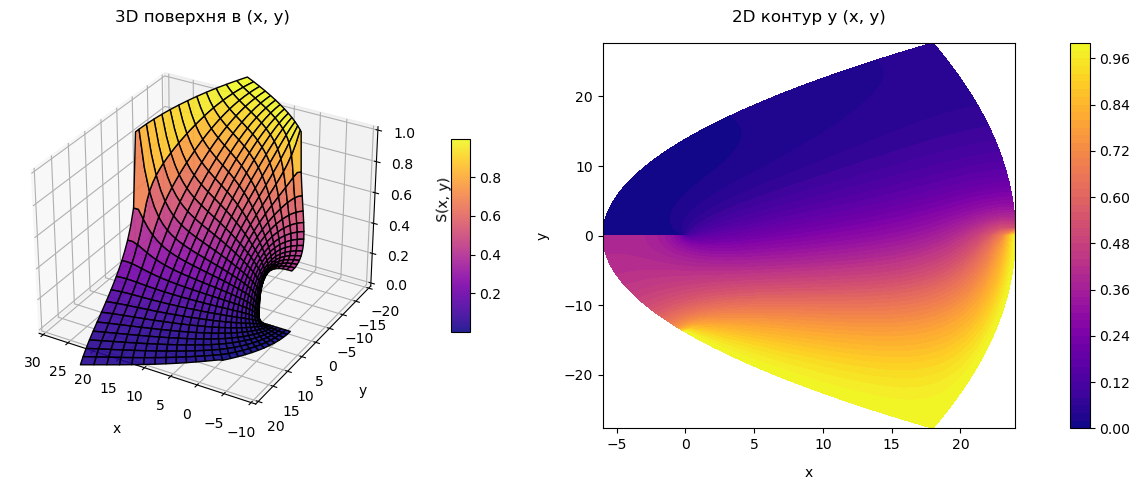

In [12]:
X = (alpha_param / 2.0) * (ETA**2 - XI**2)
Y = XI * ETA * np.sqrt(alpha_param * beta_param)

fig = plt.figure(figsize=(12, 5))

ax3 = fig.add_subplot(1, 2, 1, projection='3d')
surface2 = ax3.plot_surface(X, Y, solution_reshaped.T, cmap='plasma', edgecolor='k', alpha=0.9)
ax3.set_xlabel('x', labelpad=10)
ax3.set_ylabel('y', labelpad=10)
ax3.set_zlabel('S(x, y)', labelpad=10)
ax3.set_xlim(30, -10)
ax3.set_ylim(20, -20)
ax3.set_title('3D поверхня в (x, y)', pad=15)
fig.colorbar(surface2, ax=ax3, shrink=0.5, aspect=10, pad=0.1)

ax4 = fig.add_subplot(1, 2, 2)
contour2 = ax4.contourf(X, Y, solution_reshaped.T, 50, cmap='plasma')
ax4.set_xlabel('x', labelpad=10)
ax4.set_ylabel('y', labelpad=10)
ax4.set_title('2D контур у (x, y)', pad=15)
fig.colorbar(contour2, ax=ax4, orientation='vertical', pad=0.1)

plt.tight_layout()
plt.show()